In [ ]:
# Install Dependencies 
%pip install pandas 
%pip install numpy
%pip install plotly
%pip install xgboost
%pip install lightgbm
%pip install matplotlib
%pip install sklearn
# %pip install tensorflow
%pip install explainerdashboard
%pip install optuna
%pip install pyngrok
%pip install pycaret
%pip install -U jinja2==3.0.3

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
import plotly.express as px
import plotly.graph_objects as go
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore' )
from sklearn.model_selection import cross_val_score, ShuffleSplit, KFold, StratifiedKFold, train_test_split
from sklearn.feature_selection import RFECV, SelectKBest, f_regression,chi2, VarianceThreshold, RFE
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
# Algorithm Imports
from sklearn.ensemble import RandomForestRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline

from pycaret.utils import enable_colab
enable_colab()


/usr/local/lib/python3.7/dist-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


Colab mode enabled.


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Dataset/house_data - house_data.csv.csv')

In [4]:
print(f'rows of data: ', len(data))
data.head()

rows of data:  21613


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [5]:
data.drop(['id'], axis = 1, inplace = True)

In [8]:
data.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.401822e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,3.673622e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [6]:
ds = data.copy()

In [12]:
#  Check for Null Values
ds.isnull().sum().sort_values(ascending = False).head()

price            0
bedrooms         0
sqft_living15    0
long             0
lat              0
dtype: int64

In [21]:
# determine categorical values

from pycaret.regression import *
experiment = setup(data=ds, target='price', session_id=42)

,Description,Value
0,session_id,42
1,Target,price
2,Original Data,"(21613, 20)"
3,Missing Values,False
4,Numeric Features,13
5,Categorical Features,5
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(15129, 69)"


In [7]:
cat_cols = ['waterfront', 'view', 'condition', 'grade']

In [8]:
# Placing data into required data types

ds.date = ds.date.str[:8] # Select the first 8 letters of the strings
# Convert date column to Datetime and set it to index
from datetime import datetime
ds['date'] = pd.to_datetime(ds['date'], format='%Y%m%d')
ds.set_index('date', inplace= True)

# Convert Categorical Columns to str dtypes
def string_convert(x):
  x = str(x)
  return x

for i in cat_cols:
  ds[i] = ds[i].apply(string_convert)

In [9]:
# Identify numerical and categorical columns 
cat = ds.select_dtypes(include = 'object').columns.tolist()
num = ds.select_dtypes(exclude = 'object').columns.tolist()
print(f'number of categorical features:', len(cat))
print(f'number of numerical features:',len( num))

number of categorical features: 4
number of numerical features: 15


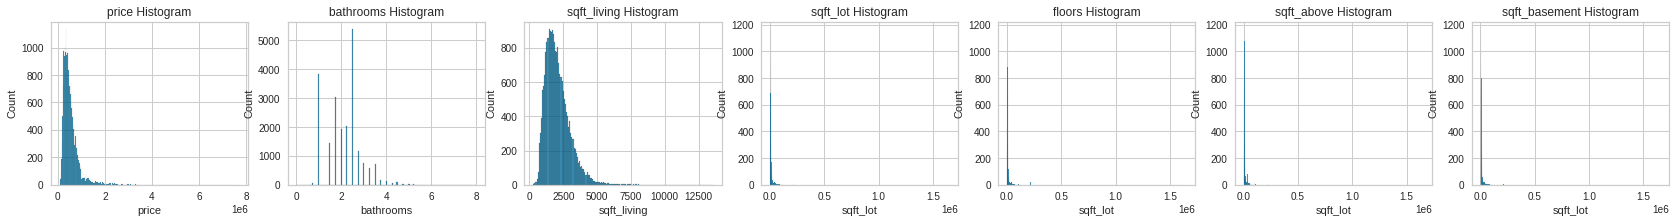

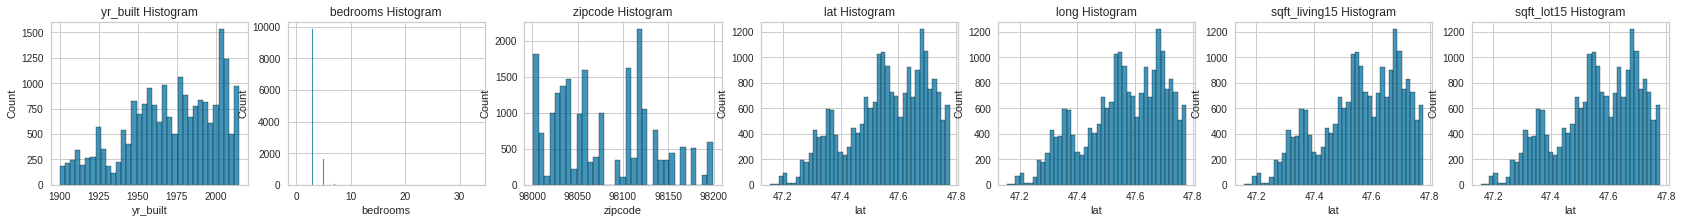

In [14]:
# Check for Gaussian Distribution of Data using Histogram

nums = ds.select_dtypes(exclude = 'object') # select numerical features only
def outlier (a,b,c,d,e,f,g):
  plt.figure(figsize=(29,3))
  plt.subplot(1,7,1)
  sns.histplot(nums[a])
  plt.title(a + ' Histogram')

  plt.subplot(1,7,2)
  sns.histplot(nums[b])
  plt.title(b + ' Histogram')

  plt.subplot(1,7,3)
  sns.histplot(nums[c])
  plt.title(c + ' Histogram')

  plt.subplot(1,7,4)
  sns.histplot(nums[d])
  plt.title(d + ' Histogram')

  plt.subplot(1,7,5)
  sns.histplot(nums[d])
  plt.title(e + ' Histogram')

  plt.subplot(1,7,6)
  sns.histplot(nums[d])
  plt.title(f + ' Histogram')

  plt.subplot(1,7,7)
  sns.histplot(nums[d])
  plt.title(g + ' Histogram')


outlier('price', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'sqft_above', 'sqft_basement' )
outlier('yr_built', 'bedrooms', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15')

The 'Year Renovated' feature is a combination of date. Since we have a dat index already, and the data is widely unequally distributed, we drop it.<br> <br>
Also, the distribution shows it is a not a normal distribution( it is not bell curve shape), hence we normalize so as to place the range of values btw 0 and 1 because our algorithm does not make assumption about the distribution of our data. <br>
it is also important to note that it is not a good practixe to scale the output data, hence we leave 'price' while normalizing

In [10]:
ds.drop(['yr_renovated'], axis = 1, inplace = True)

- We create another variable containing our dataset so we can check the impact of normalising on the dataset on the model,
If favourable, we normalize with our base variable <br>
- After which, we ascertain the best model to use and  the best features to select

In [26]:
# instantiate the normalizer
from sklearn.preprocessing import MinMaxScaler
normalizer  = MinMaxScaler()

dx = ds.copy() # Create another container variable for our dataset

dx_cols  = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'zipcode', 'lat', 'long', 'sqft_living15',
       'sqft_lot15']

# Normalize every other column except the target output
for i in dx_cols:
  dx[i] = normalizer.fit_transform(dx[[i]])

dx_experiment = setup(data=dx, target='price', session_id=2)
best_model = compare_models(fold=3, sort='R2', cross_validation = True)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,69154.0356,1.642230e+10,127773.4942,0.8771,0.1745,0.1308,0.5700
et,Extra Trees Regressor,72240.0419,1.809606e+10,134297.0844,0.8641,0.1835,0.1361,3.0000
rf,Random Forest Regressor,72592.9834,1.891892e+10,137204.0295,0.8583,0.1826,0.1358,6.0700
gbr,Gradient Boosting Regressor,79137.6812,1.912918e+10,138123.2769,0.8562,0.1943,0.1508,1.9533
knn,K Neighbors Regressor,88975.8672,2.890695e+10,169643.2344,0.7834,0.2170,0.1608,0.4033
dt,Decision Tree Regressor,102762.9053,3.618956e+10,189917.3524,0.7284,0.2546,0.1880,0.1167
ridge,Ridge Regression,126059.6510,4.097063e+10,202167.2292,0.6920,0.4264,0.2553,0.0167
br,Bayesian Ridge,126339.8078,4.096027e+10,202156.1916,0.6920,0.4192,0.2561,0.0233
llar,Lasso Least Angle Regression,126338.1429,4.096240e+10,202162.5366,0.6919,0.4142,0.2560,0.0200
lasso,Lasso Regression,126389.4531,4.096219e+10,202163.2344,0.6919,0.4185,0.2562,0.0733


In [28]:
lgbm_model = create_model('lightgbm', fold=5)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,69639.2907,1.594253e+10,126263.7447,0.8802,0.1732,0.1288
1,71169.9198,1.578029e+10,125619.6288,0.8810,0.1731,0.1318
2,65790.7500,1.243209e+10,111499.2995,0.8906,0.1737,0.1304
3,68338.4521,2.110837e+10,145287.2018,0.8565,0.1774,0.1321
4,69886.7878,1.656271e+10,128696.1812,0.8802,0.1742,0.1297
Mean,68965.0401,1.636520e+10,127473.2112,0.8777,0.1743,0.1306
Std,1823.9768,2.775852e+09,10760.0962,0.0113,0.0016,0.0013


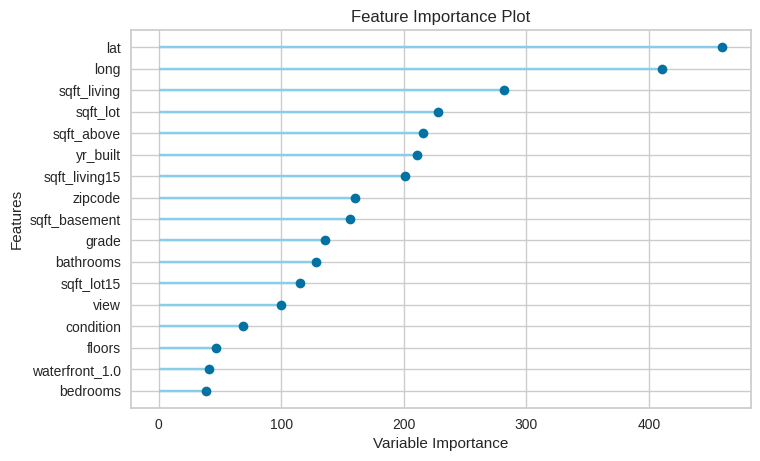

In [18]:
plot_model(lgbm_model, plot='feature_all')

- According to Feature Selection plot, only 13 columns are important
- We move forward to feature with recursve feature elimination and selectKbest to establish surety

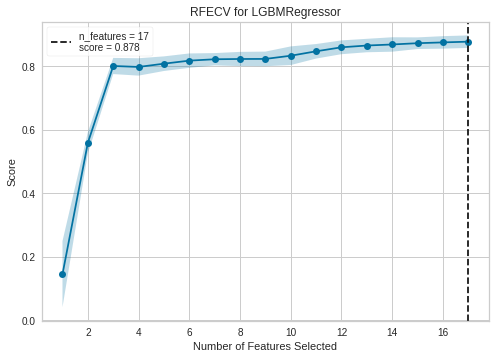

In [29]:
# Plot Using Recursive Feature Elimination
plot_model(lgbm_model, plot='rfe')

------------------------------------------------------------------------------------------
### Advanced Setup and Final Modelling

In [62]:
# create train - test datasets
train_set, test_set = train_test_split(ds, test_size = 0.2, random_state = 34)
print(f'train size: ', train_set.shape)
print(f'test size: ', test_set.shape)

train size:  (17290, 18)
test size:  (4323, 18)


In [63]:
from pycaret.regression import *
adv_setup = setup(data=train_set, 
                    target='price', 
                    session_id=42,
                    imputation_type='iterative',
                    remove_multicollinearity=True,
                    multicollinearity_threshold=0.9,
                    
                   ) 

,Description,Value
0,session_id,42
1,Target,price
2,Original Data,"(17290, 18)"
3,Missing Values,False
4,Numeric Features,12
5,Categorical Features,5
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(12102, 46)"


INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[], ml_usecase='regression',
                                      numerical_features=[], target='price',
                                      time_features=[])),
                ('imputer',
                 Iterative_Imputer(add_indicator=False,
                                   classifier=LGBMClassifier(boosting_type='gbdt',
                                                             class_weight=None,
                                                             colsample_bytree=1.0,...
                ('dummy', Dummify(target='price')),
                ('fix_perfect', Remove_100(target='price')),
                ('clean_names', Clean_

In [79]:
# Preprocess data by one hot-endoding and removing low variance values if there are any
X_train = get_config('X_train')
X_train.head()

INFO:logs:Initializing get_config()
INFO:logs:get_config(variable=X_train)
INFO:logs:Global variable: X_train returned as             bathrooms  sqft_living  sqft_lot  floors  sqft_above  \
date                                                               
2014-06-25       2.75       2720.0    4613.0     2.0      2720.0   
2015-04-15       2.75       2300.0   12197.0     2.0      2300.0   
2014-08-26       2.50       2530.0   10190.0     1.0      1290.0   
2014-06-03       2.25       1790.0    7203.0     1.0      1110.0   
2014-06-10       2.50       2550.0   45254.0     2.0      2550.0   
...               ...          ...       ...     ...         ...   
2014-10-16       0.75        770.0    4600.0     1.0       770.0   
2014-07-08       2.00       1150.0    9812.0     1.0      1150.0   
2014-06-04       3.25       4720.0   32467.0     2.0      3190.0   
2014-07-21       1.75       1070.0    9000.0     1.0      1070.0   
2014-05-14       2.75       2270.0    7375.0     1.0      1290

,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,zipcode,lat,long,...,grade_11,grade_12,grade_13,grade_3,grade_4,grade_5,grade_6,grade_7,grade_8,grade_9
date,,,,,,,,,,,,,,,,,,,,,
2014-06-25,2.75,2720.0,4613.0,2.0,2720.0,0.0,2005.0,98028.0,47.735199,-122.223000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2015-04-15,2.75,2300.0,12197.0,2.0,2300.0,0.0,1989.0,98166.0,47.436901,-122.337997,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2014-08-26,2.50,2530.0,10190.0,1.0,1290.0,1240.0,1960.0,98008.0,47.616001,-122.114998,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2014-06-03,2.25,1790.0,7203.0,1.0,1110.0,680.0,1973.0,98155.0,47.770901,-122.293999,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2014-06-10,2.50,2550.0,45254.0,2.0,2550.0,0.0,2001.0,98053.0,47.649799,-121.963997,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [66]:
X_train.columns # After one hot encoding and removal of target feature

Index(['bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'sqft_above',
       'sqft_basement', 'yr_built', 'zipcode', 'lat', 'long', 'sqft_living15',
       'sqft_lot15', 'bedrooms_0', 'bedrooms_1', 'bedrooms_10', 'bedrooms_2',
       'bedrooms_3', 'bedrooms_33', 'bedrooms_4', 'bedrooms_5', 'bedrooms_6',
       'bedrooms_7', 'bedrooms_8', 'bedrooms_9', 'waterfront_1', 'view_0',
       'view_1', 'view_2', 'view_3', 'view_4', 'condition_1', 'condition_2',
       'condition_3', 'condition_4', 'condition_5', 'grade_10', 'grade_11',
       'grade_12', 'grade_13', 'grade_3', 'grade_4', 'grade_5', 'grade_6',
       'grade_7', 'grade_8', 'grade_9'],
      dtype='object')

In [97]:
best_model = compare_models(fold=3, sort='r2')

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,70372.8846,1.684410e+10,1.293835e+05,0.8702,0.1768,0.1327,0.4667
gbr,Gradient Boosting Regressor,80027.4445,1.845715e+10,1.357224e+05,0.8572,0.1980,0.1540,1.7533
et,Extra Trees Regressor,74107.7467,1.884116e+10,1.367304e+05,0.8550,0.1869,0.1389,3.6367
rf,Random Forest Regressor,74960.3041,2.038427e+10,1.426496e+05,0.8418,0.1867,0.1389,5.8033
lasso,Lasso Regression,118816.2526,3.568090e+10,1.885527e+05,0.7245,0.3144,0.2331,0.2400
ridge,Ridge Regression,118844.8854,3.566804e+10,1.885351e+05,0.7245,0.3136,0.2335,0.0533
llar,Lasso Least Angle Regression,118771.7679,3.567953e+10,1.885491e+05,0.7245,0.3140,0.2330,0.0600
br,Bayesian Ridge,118832.4353,3.567562e+10,1.885481e+05,0.7245,0.3139,0.2334,0.0733
lr,Linear Regression,120395.6354,3.637797e+10,1.903258e+05,0.7193,0.3177,0.2370,1.1967
dt,Decision Tree Regressor,107376.3409,4.048539e+10,2.009236e+05,0.6836,0.2659,0.1961,0.1500


INFO:logs:create_model_container: 40
INFO:logs:master_model_container: 40
INFO:logs:display_container: 9
INFO:logs:LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=42, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
INFO:logs:compare_models() succesfully completed......................................


In [81]:
# Create model.
lgbm_model  = create_model('lightgbm', fold=3)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,73169.9395,2.030382e+10,142491.4846,0.8536,0.1788,0.1330
1,67752.6102,1.383373e+10,117616.8761,0.8835,0.1741,0.1317
2,70196.1041,1.639476e+10,128042.0204,0.8736,0.1774,0.1335
Mean,70372.8846,1.684410e+10,129383.4604,0.8702,0.1768,0.1327
Std,2215.1452,2.660446e+09,10199.2200,0.0125,0.0020,0.0007


INFO:logs:create_model_container: 22
INFO:logs:master_model_container: 22
INFO:logs:display_container: 7
INFO:logs:LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=42, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
INFO:logs:create_model() succesfully completed......................................


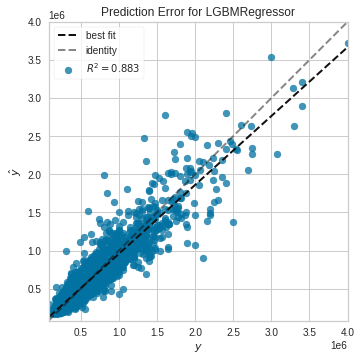

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [83]:
# Plot model prediction error
plot_model(lgbm_model, plot='error')

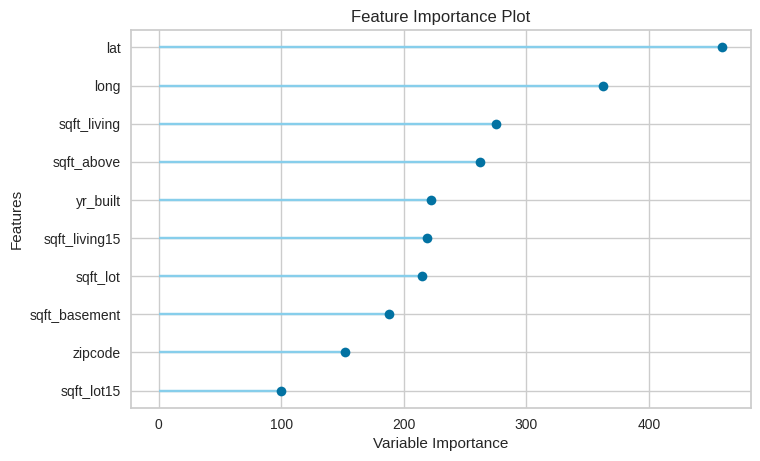

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [84]:
# plot the top 10 model features that has higest predictive power
plot_model(lgbm_model, plot='feature')

### SHAP Summary Plot

Shows effects of each feature on model predictions based on SHAP values for the entire test dataset. 

Positive values have a positive influence on model (pushes it to predict the positive class) and negative values have a negative influence on the model (pushes it to predict the negative class)

INFO:logs:Initializing interpret_model()
INFO:logs:interpret_model(estimator=LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=42, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0), use_train_data=False, X_new_sample=None, y_new_sample=None, feature=None, kwargs={}, observation=None, plot=summary, save=False)
INFO:logs:Checking exceptions
INFO:logs:plot type: summary
INFO:logs:Creating TreeExplainer
INFO:logs:Compiling shap values


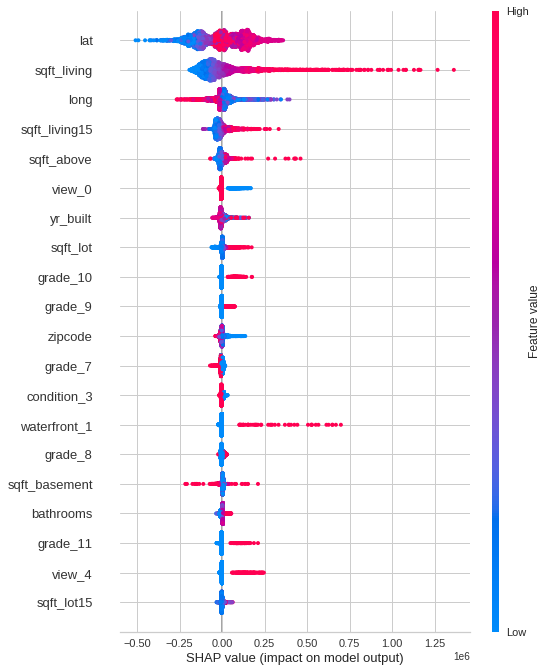

INFO:logs:Visual Rendered Successfully
INFO:logs:interpret_model() succesfully completed......................................


In [86]:
interpret_model(lgbm_model, plot='summary')

------------------------------------------------------------------------------------------
### Finalize Model for Deployment

It is important to note that the library been used here divides a dataset into train and cross validation set. It trains the model on the trainset and validates the accuracy of the model on previously created cross validation set. <br> <br>
We now run a totally new dataset (test_set) on the model to check the accuracy of the model  

In [ ]:
final_model = finalize_model(lgbm_model)

In [93]:
#Final Light Gradient Boosting Model to be used for deployment
final_model

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=42, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

Predict on unseen / new datasets<br>
The unseen data is the  `test_set` variable created initially and contains 20% of the original dataset which was never exposed to PyCaret.

In [94]:
predictions = predict_model(lgbm_model, data=test_set)
predictions.head()

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=42, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0), probability_threshold=None, encoded_labels=True, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.REGRESSION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,71425.5408,2.312870e+10,152081.2169,0.866,0.1782,0.132


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,Label
date,,,,,,,,,,,,,,,,,,,
2015-03-11,756100.0,4,2.0,2000,8317,1.5,0,0,4,8,2000,0,1917,98126,47.5394,-122.379,1390,6001,577305.504568
2014-06-24,218000.0,3,1.0,880,18205,1.0,0,0,4,6,880,0,1945,98178,47.5013,-122.244,1110,16115,216310.196037
2014-07-23,455000.0,4,2.5,2090,4400,2.0,0,0,3,8,2090,0,2011,98118,47.5403,-122.286,2090,3430,532305.833528
2015-01-05,299999.0,4,2.5,1981,4828,2.0,0,0,3,8,1981,0,2013,98092,47.3252,-122.167,1981,3783,307863.757630
2015-02-24,258305.0,2,1.5,750,2964,1.0,0,0,5,5,750,0,1919,98118,47.5518,-122.277,1350,3090,272717.907281


Label is the price prediction.

Notice that predicted results are concatenated to the original dataset.

In [98]:
# Save Model
save_model(lgbm_model, 'housePrice_model')

INFO:logs:Initializing save_model()
INFO:logs:save_model(model=LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=42, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0), model_name=housePrice_model, prep_pipe_=Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[], ml_usecase='regression',
                                      numerical_features=[], target='price',
                                      time_features=[])),
                ('imputer',
            

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=[], target='price',
                                       time_features=[])),
                 ('imputer',
                  Iterative_Imputer(add_indicator=False,
                                    classifier=LGBMClassifier(boosting_type='gbdt',
                                                              class_weight=None,
                                                              colsample_bytree=1.0,...
                  LGBMRegressor(boosting_type='gbdt', class_weight=None,
                                colsample_bytree=1.0, importance_type='split',
                                learning_rate=0.1, max_depth=-1,
                                min

In [99]:
ls

drive/  housePrice_model.pkl  logs.log  sample_data/


In [ ]:
/content/housePrice_model.pkl